# Final Results - <b>General Results</b>


In [1]:
### IMPORT LIBRARIES ###
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import VTP_tools
import h5_tools
import qgrid

### FIGURE STYLE ###
sns.set()
sns.set_context("notebook")
from jupyterthemes import jtplot
jtplot.style()

In [167]:
reload(h5_tools)

### EXTRACT DATA FROM H5 FILE ###
sim_numbers = range(0, 5)
data, params = h5_tools.geth5Data(sim_numbers, path = 'AON_FON/pstudy/')

qgrid_widget = qgrid.show_grid(data)
qgrid_widget

UWdyaWRXaWRnZXQoZ3JpZF9vcHRpb25zPXsnaGlnaGxpZ2h0U2VsZWN0ZWRSb3cnOiBUcnVlLCAnZnVsbFdpZHRoUm93cyc6IFRydWUsICdyb3dIZWlnaHQnOiAyOCwgJ2VuYWJsZUNvbHVtblLigKY=


## Displacement of the cell - How much do cells migrate?

In [18]:
### READ VTP INTO A DATAFRAME ###
nodesData = VTP_tools.getNodesData([0, 350, 700], 'AON_FON/extract_files/sample_20/')

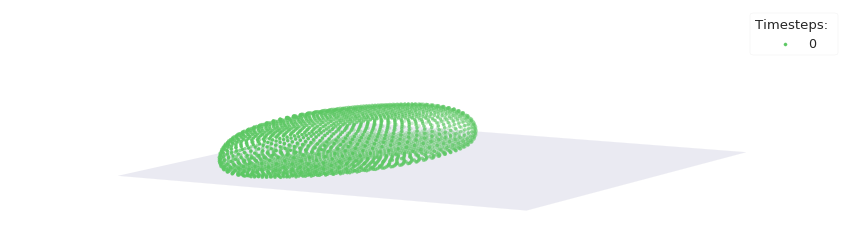

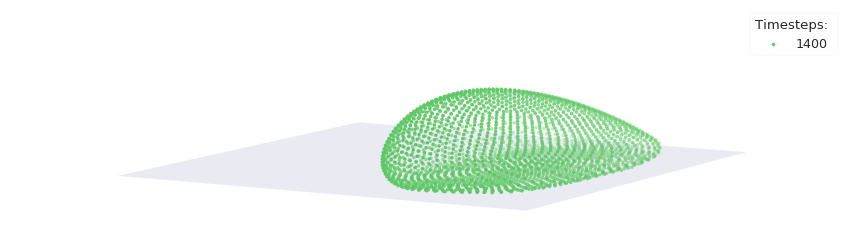

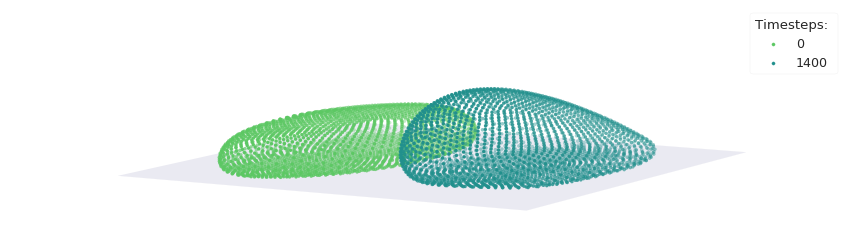

In [40]:
### PLOT NODES DATA ###

VTP_tools.plotNodes3DOverlapped(nodesData, [0])
VTP_tools.plotNodes3DOverlapped(nodesData, [700])
VTP_tools.plotNodes3DOverlapped(nodesData, [0,700])

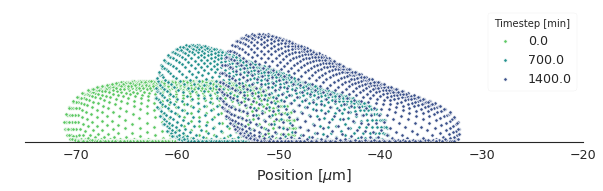

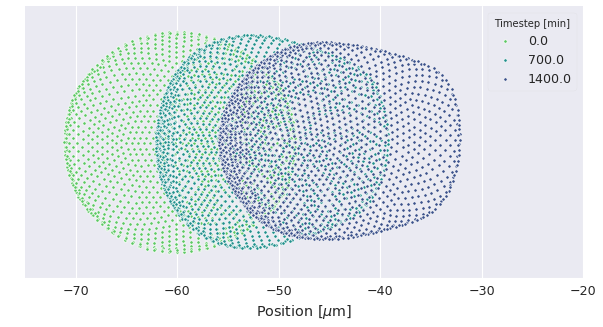

In [67]:
### PLOT NODES DATA ###
VTP_tools.plotNodes2DOverlapped(nodesData, view='XZ')
VTP_tools.plotNodes2DOverlapped(nodesData)

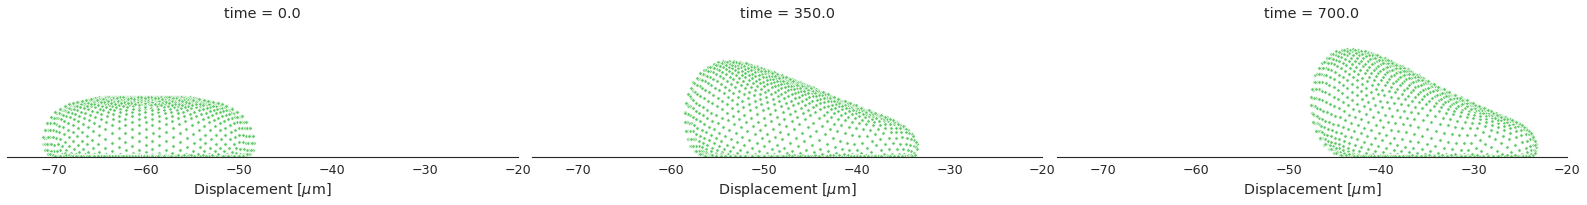

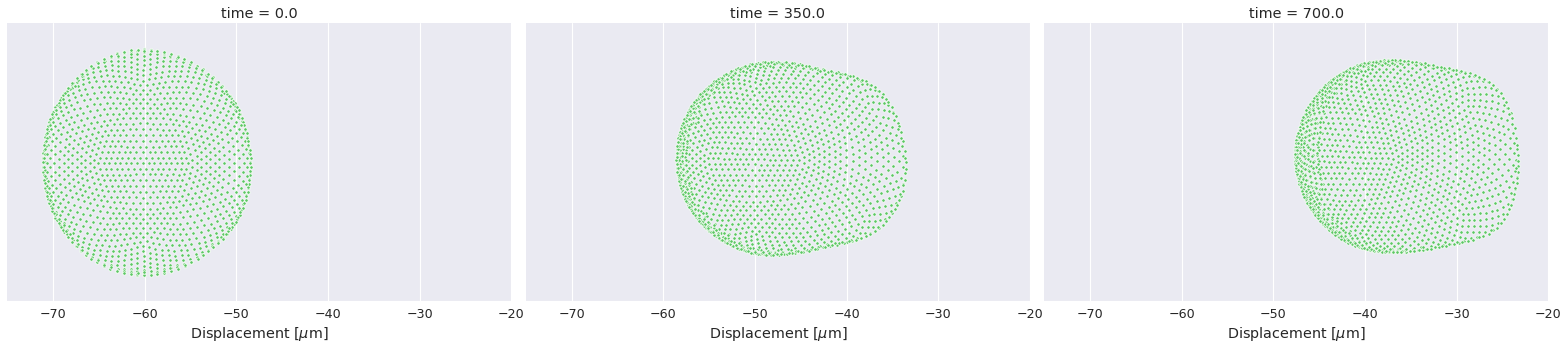

In [26]:
### PLOT NODES DATA ###
nodesData = VTP_tools.getNodesData([0, 350, 700], 'AON_FON/extract_files/sample_20/')

VTP_tools.plotNodes2DSubplots(nodesData, view='XZ')
VTP_tools.plotNodes2DSubplots(nodesData)

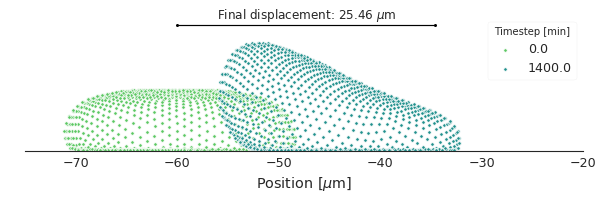

In [123]:
### PLOT FINAL DISPLACEMENT - SAMPLE 21 ###

VTP_tools.plotFinalDisp(nodesData, data, 20)

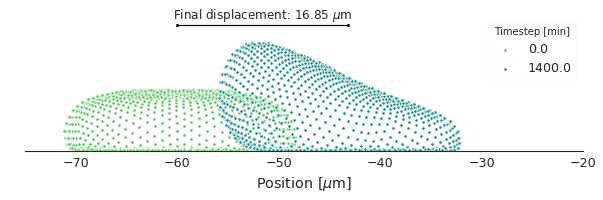

In [122]:
### PLOT FINAL DISPLACEMENT - SAMPLE 11 ###
nodesData = VTP_tools.getNodesData([0, 350, 700], 'AON_FON/extract_files/sample_11/')

VTP_tools.plotFinalDisp(nodesData, data, 11)

### Final Displacement 
The final displacement of the cell will be used to compare different samples on their ability to migrate. Three types of plots will be generated:

<Figure size 1440x720 with 0 Axes>

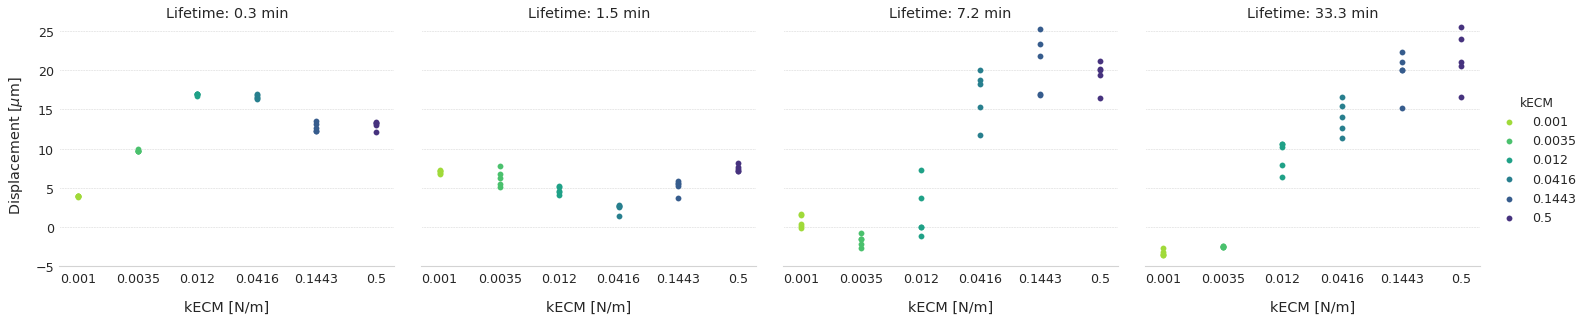

<Figure size 1440x720 with 0 Axes>

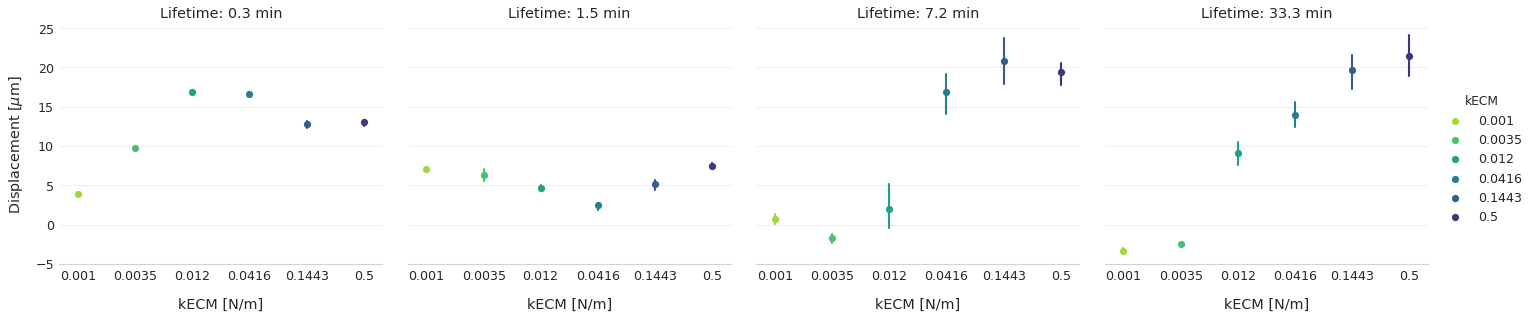

In [116]:
### PLOT DISPLACEMENT - FINAL VALUE ###

h5_tools.plotFinalDisp(data, 'all')
h5_tools.plotFinalDisp(data)

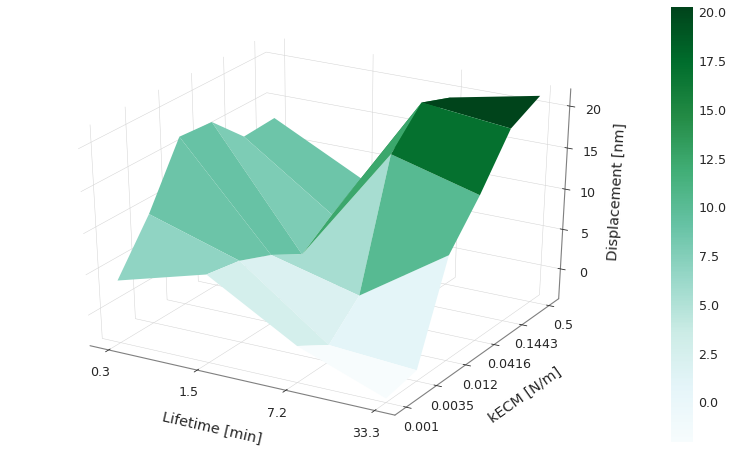

In [120]:
### 3D FINAL DISP ###

h5_tools.plotMetric3D('final_disp', data)

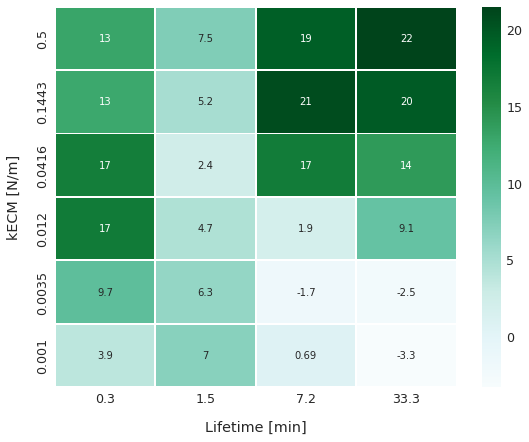

In [71]:
### HEATMAP FINAL DISP ###
h5_tools.plotMetricHeatMap('final_disp', data, params)

## Types of displacement plots - How do cells migrate?

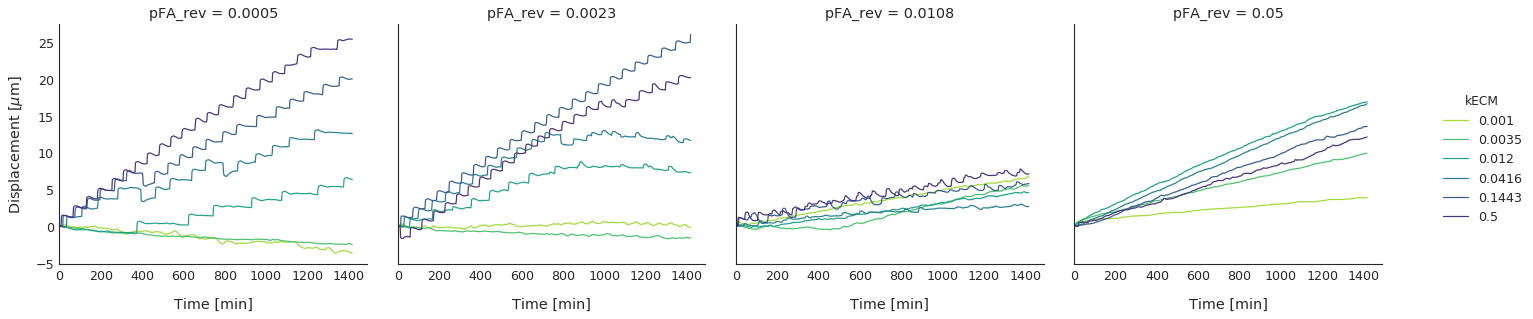

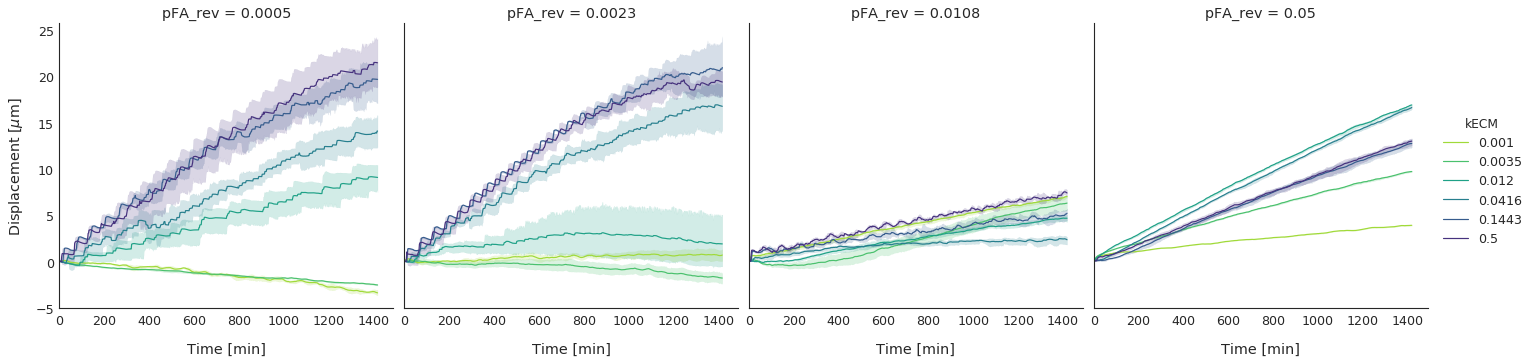

In [128]:
reload(h5_tools)

h5_tools.plotDisp(data)
h5_tools.plotDisp(data, mode='overlap')

In [156]:
reload(h5_tools)

jumpsValues, jumpsInfo = h5_tools.getJumps(data)

qgrid_widget = qgrid.show_grid(jumpsInfo)
qgrid_widget

UWdyaWRXaWRnZXQoZ3JpZF9vcHRpb25zPXsnaGlnaGxpZ2h0U2VsZWN0ZWRSb3cnOiBUcnVlLCAnZnVsbFdpZHRoUm93cyc6IFRydWUsICdyb3dIZWlnaHQnOiAyOCwgJ2VuYWJsZUNvbHVtblLigKY=


/home/ines/python_envs/generic/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


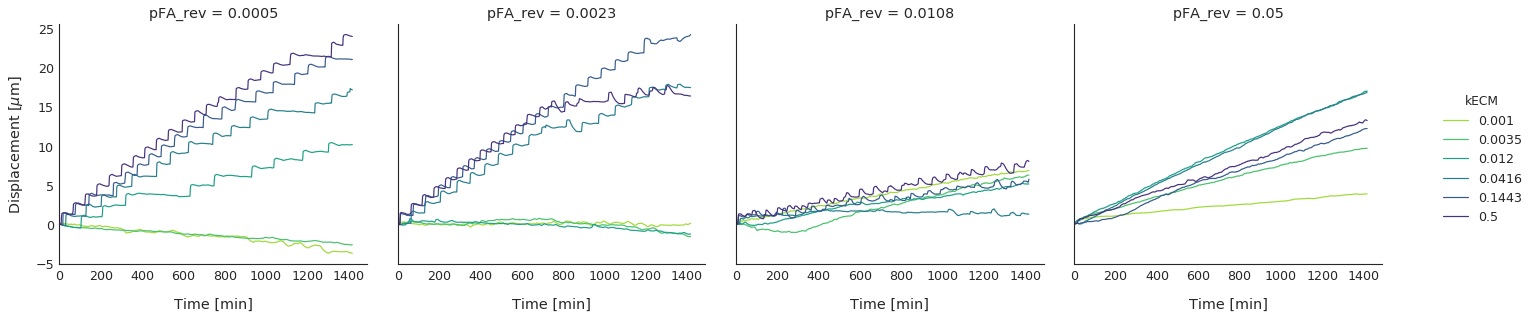

In [220]:
### ABSOLUTE MIGRATION ###

sim_numbers = range(0, 5)
data, params = h5_tools.geth5Data(sim_numbers, path = 'AON_FON/pstudy/')

for sim in range(0,5):
    
    for samp in range(0,24):
        
        negJumps = jumpsValues[sim + 1][samp]['neg_jumps']
        fullJumps = jumpsValues[sim + 1][samp]['full_jumps']
        sampData = data[data['sim_num'] == sim + 1][data['samp_num'] == samp]
        sampDiffDisp = sampData['diff_disp'].copy()
        
        if np.size(negJumps) != 0:
        
            # Invert displacement for negative peaks
            for ind, jump in enumerate(fullJumps):
                
                if ind < np.size(fullJumps) - 1:
                    
                    if np.any(negJumps == jump):
                        
                        sampDiffDisp.iloc[jump/2 - 5 : fullJumps[ind + 1]/2 - 1] = - sampDiffDisp.iloc[jump/2 - 5 : fullJumps[ind + 1]/2 - 1]
                        
                else:
                    
                    if np.any(negJumps == jump):
                        
                        sampDiffDisp.iloc[jump/2 - 5 :] = - sampDiffDisp.iloc[jump/2 - 5 :]
                    
                    
        sampCumDisp = np.cumsum(sampDiffDisp)
        data['abs_disp'][sim * 24 * 710 + (samp * 710): sim * 24 * 710 + (samp * 710) + 710] = sampCumDisp


g = sns.FacetGrid(data[data['sim_num'] == 3], col="pFA_rev", hue="kECM", margin_titles=True, size=5)

g = (g.map(plt.plot, "time", "abs_disp")
    .set(xlim=(0, None))
    .add_legend()
    .set_ylabels("Displacement [$\mu$m]", labelpad=10)
    .set_xlabels("Time [min]", labelpad=15)
    .fig.subplots_adjust(wspace=.1, hspace=.05))

plt.subplots_adjust(top=.8)
        